In [1953]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [1954]:
df1=pd.read_csv('movie_prediction.csv',index_col=11)
df1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [1955]:
df1.shape

(5043, 27)

In [1956]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, Avatar  to My Date with Drew 
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 n

In [1957]:
df1.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [1958]:
df1.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

#### Removing unwanted Columns

In [1959]:
df1.drop(['color','director_name','actor_2_name','actor_1_name','actor_3_name','movie_imdb_link','plot_keywords'],axis=1,inplace=True)

In [1960]:
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,
Avatar,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,602.0,148.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,NaN,131.0,NaN,131.0,NaN,Documentary,8,143,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### Imputing Numerical Columns

In [1961]:
df1.isnull().sum()

num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        884
genres                         0
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [1962]:
lt1=['num_critic_for_reviews','facenumber_in_poster',"actor_1_facebook_likes","title_year","actor_2_facebook_likes","actor_3_facebook_likes",'duration','director_facebook_likes','num_voted_users','num_user_for_reviews','budget']

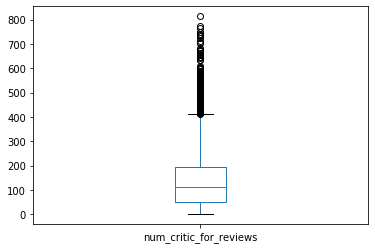

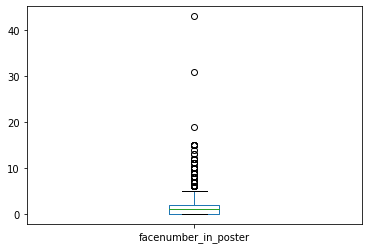

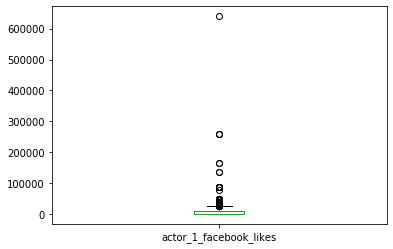

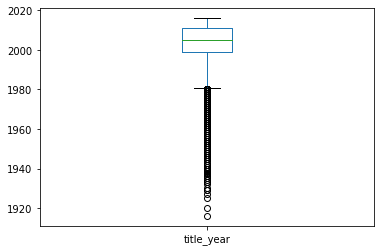

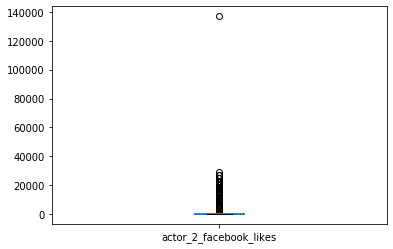

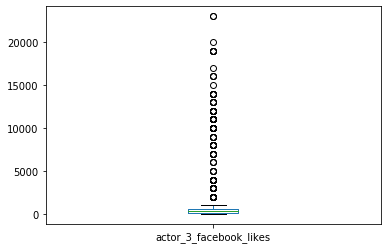

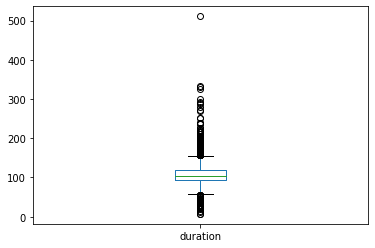

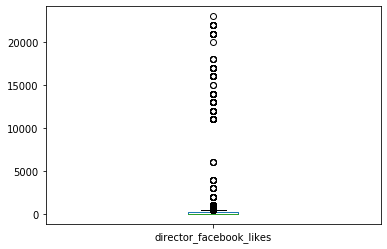

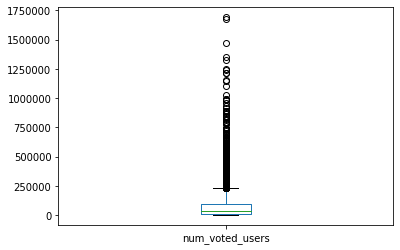

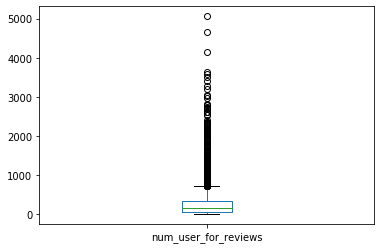

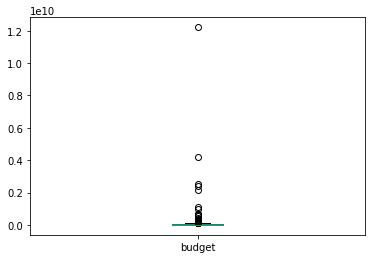

In [1963]:
for i in lt1:
    df1[i].plot(kind='box')
    plt.show()

### From the above bove plots of numeric variable, following insights are found:
 All the above columns are affected by outliers
 Its good to impute them with median
 
 In particular,
 * The title_year is left skewed, we can bucket them to change as levels ie) before 2010 and after 2010

In [1964]:
!pip install missingpy

In [1965]:
from sklearn.impute import KNNImputer

In [1966]:
# 1
impu=KNNImputer()
data2=impu.fit_transform(df1[lt1])
data2=pd.DataFrame(data2,columns=lt1,index=df1.index)

In [1967]:
data2.isnull().sum()

num_critic_for_reviews     0
facenumber_in_poster       0
actor_1_facebook_likes     0
title_year                 0
actor_2_facebook_likes     0
actor_3_facebook_likes     0
duration                   0
director_facebook_likes    0
num_voted_users            0
num_user_for_reviews       0
budget                     0
dtype: int64

#### Imputing Categorical Columns

In [1968]:
ct=['language','country','content_rating']
df1[ct].isnull().sum()

language           12
country             5
content_rating    303
dtype: int64

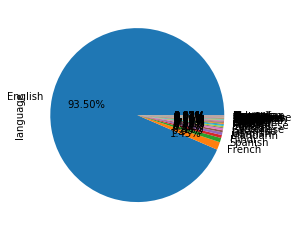

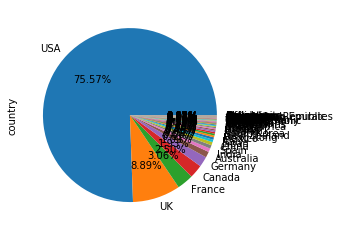

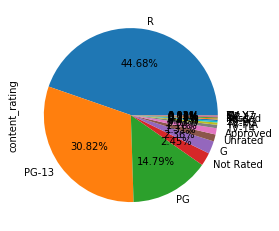

In [1969]:
for i in ct:
    df1[i].value_counts().plot(kind='pie',autopct="%.2f%%")
    plt.show()

* Country and Language are highly biased towards USA and English respectively
* so, it add least information to the data frame
* Content Rating nulls are imputed with new value as "MISSING"

In [1970]:
df1.drop(['country','language'],axis=1,inplace=True)

In [1971]:
df1["content_rating"].fillna("Unrated",inplace=True)

In [1972]:
df1["content_rating"]=df1["content_rating"].replace({'GP':'PG','Not Rated':'NC-17','X':'NC-17','M':'NC-17','Passed':'G','Approved':'G'})

In [1973]:
def bucket(x):
    if x<2000:
        return 'less than 2000'
    elif x<=2004:
        return 'less than 2004'
    elif x<=2009:
        return 'less than 2010'
    else:
        return 'after 2010'
data2.title_year=data2.title_year.apply(bucket)

In [1974]:
data4=pd.concat([data2,df1["gross"],df1["content_rating"]],axis=1)

In [1975]:
data4.isnull().sum()

num_critic_for_reviews       0
facenumber_in_poster         0
actor_1_facebook_likes       0
title_year                   0
actor_2_facebook_likes       0
actor_3_facebook_likes       0
duration                     0
director_facebook_likes      0
num_voted_users              0
num_user_for_reviews         0
budget                       0
gross                      884
content_rating               0
dtype: int64

In [1976]:
data4

,num_critic_for_reviews,facenumber_in_poster,actor_1_facebook_likes,title_year,actor_2_facebook_likes,actor_3_facebook_likes,duration,director_facebook_likes,num_voted_users,num_user_for_reviews,budget,gross,content_rating
movie_title,,,,,,,,,,,,,
Avatar,723.0,0.0,1000.0,less than 2010,936.0,855.0,178.0,0.0,886204.0,3054.0,237000000.0,760505847.0,PG-13
Pirates of the Caribbean: At World's End,302.0,0.0,40000.0,less than 2010,5000.0,1000.0,169.0,563.0,471220.0,1238.0,300000000.0,309404152.0,PG-13
Spectre,602.0,1.0,11000.0,after 2010,393.0,161.0,148.0,0.0,275868.0,994.0,245000000.0,200074175.0,PG-13
The Dark Knight Rises,813.0,0.0,27000.0,after 2010,23000.0,23000.0,164.0,22000.0,1144337.0,2701.0,250000000.0,448130642.0,PG-13
Star Wars: Episode VII - The Force Awakens,8.4,0.0,131.0,after 2010,12.0,6.2,91.4,131.0,8.0,5.0,1660000.0,NaN,Unrated
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Signed Sealed Delivered,1.0,2.0,637.0,after 2010,470.0,318.0,87.0,2.0,629.0,6.0,5160000.0,NaN,Unrated
The Following,43.0,1.0,841.0,less than 2000,593.0,319.0,43.0,2639.6,73839.0,359.0,23340000.0,NaN,TV-14
A Plague So Pleasant,13.0,0.0,0.0,after 2010,0.0,0.0,76.0,0.0,38.0,3.0,1400.0,NaN,Unrated


Finally gross columns as about 884 nulls,
Since it is our target column holding it in a seperate data frame.

Will try to predict them once our optimal accurate model is found.

In [1977]:
df2=data4[data4["gross"].isnull()]
df2.shape

(884, 13)

In [1978]:
data4.dropna(inplace=True)

In [1979]:
data4.columns

Index(['num_critic_for_reviews', 'facenumber_in_poster',
       'actor_1_facebook_likes', 'title_year', 'actor_2_facebook_likes',
       'actor_3_facebook_likes', 'duration', 'director_facebook_likes',
       'num_voted_users', 'num_user_for_reviews', 'budget', 'gross',
       'content_rating'],
      dtype='object')

#### Preprocessing 

Its necessary to train test split the data in prior to preprocessing.

In [1980]:
inp=data4.drop("gross",axis=1)
out=data4["gross"]

In [1981]:
from sklearn.model_selection import train_test_split

In [1982]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(inp,out,test_size=0.3,random_state=8)

In [1983]:
print("X_Train",X_Train.shape)
print("X_Test",X_Test.shape)
print("Y_Train",Y_Train.shape)
print("Y_Test",Y_Test.shape)

X_Train (2911, 12)
X_Test (1248, 12)
Y_Train (2911,)
Y_Test (1248,)


In [1984]:
print(Y_Train)

movie_title
Shorts                                     20916309.0
Blood Diamond                              57366262.0
Alvin and the Chipmunks: The Road Chip     85884815.0
Dope                                       17474107.0
The Darkest Hour                           21426805.0
                                              ...    
A Dangerous Method                          5702083.0
Strange Wilderness                          6563357.0
My Stepmother Is an Alien                  13854000.0
The Beaver                                   958319.0
In & Out                                   63826569.0
Name: gross, Length: 2911, dtype: float64


#### Both Train Test data pre-processing:
    * Seperating numerical data
    * Treating the skewness for respective columns with respective power transform
    * Followed by Standard Scaling of all numerical data

In [1985]:
X_Train.head()

,num_critic_for_reviews,facenumber_in_poster,actor_1_facebook_likes,title_year,actor_2_facebook_likes,actor_3_facebook_likes,duration,director_facebook_likes,num_voted_users,num_user_for_reviews,budget,content_rating
movie_title,,,,,,,,,,,,
Shorts,103.0,4.0,87000.0,less than 2010,570.0,470.0,89.0,0.0,5332.0,37.0,40000000.0,PG
Blood Diamond,166.0,0.0,29000.0,less than 2010,3000.0,452.0,143.0,380.0,400292.0,657.0,100000000.0,R
Alvin and the Chipmunks: The Road Chip,70.0,0.0,35000.0,after 2010,1000.0,1000.0,92.0,12.0,9418.0,53.0,90000000.0,PG
Dope,180.0,3.0,637.0,after 2010,256.0,190.0,103.0,44.0,56605.0,89.0,7000000.0,R
The Darkest Hour,195.0,0.0,614.0,after 2010,150.0,48.0,89.0,21.0,49312.0,211.0,30000000.0,PG-13


In [1986]:
x_train_num_data=X_Train.select_dtypes(include=np.number)
x_test_num_data=X_Test.select_dtypes(include=np.number)


In [1987]:
x_train_num_data.shape

(2911, 10)

In [1988]:
x_test_num_data.shape

(1248, 10)

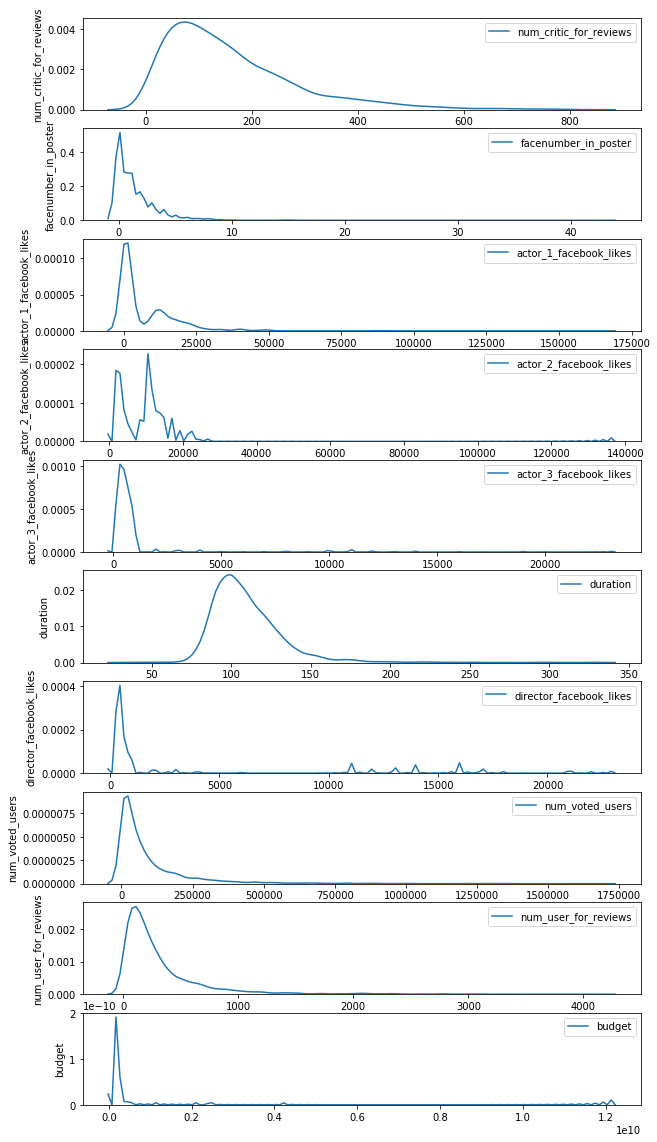

In [1989]:
plt.figure(figsize=(10,20))
for i,col in enumerate(x_train_num_data,1):
    plt.subplot(10,1,i)
    sns.kdeplot(x_train_num_data[col])
    plt.ylabel(col)
plt.show()

In [1990]:
#2
for i in x_train_num_data.columns:    
    x_train_num_data[i]=x_train_num_data[i].apply(lambda x:np.sqrt(x))
    x_test_num_data[i]=x_test_num_data[i].apply(lambda x:np.sqrt(x))


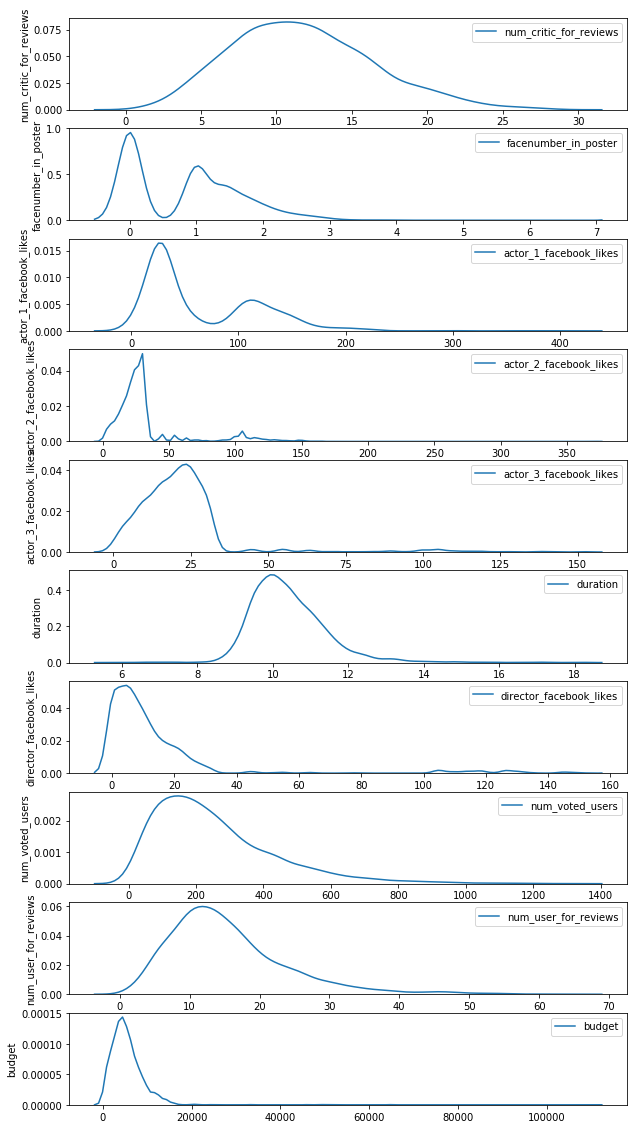

In [1991]:
plt.figure(figsize=(10,20))
for i,col in enumerate(x_train_num_data,1):
    plt.subplot(10,1,i)
    sns.kdeplot(x_train_num_data[col])
    plt.ylabel(col)
plt.show()

#### Standaed Scaling of Numeric columns

In [1992]:
#3 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num=pd.DataFrame(scaler.fit_transform(x_train_num_data),columns=x_train_num_data.columns)
X_test_num=pd.DataFrame(scaler.transform(x_test_num_data),columns=x_test_num_data.columns)

In [1993]:
X_train_num.head()

,num_critic_for_reviews,facenumber_in_poster,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,duration,director_facebook_likes,num_voted_users,num_user_for_reviews,budget
0,-0.335573,1.430587,4.339287,-0.293514,0.011923,-0.967024,-0.586195,-1.005290,-1.100690,0.229328
1,0.242280,-1.011970,1.985148,0.768395,-0.013330,1.523806,0.250046,2.088279,1.185716,1.116402
2,-0.712108,-1.011970,2.302190,-0.027222,0.610927,-0.811432,-0.437591,-0.872487,-0.960653,0.992549
3,0.354739,1.103347,-0.754056,-0.564156,-0.463714,-0.261587,-0.301640,-0.093814,-0.708744,-0.658558
4,0.470476,-1.011970,-0.762740,-0.693126,-0.876724,-0.967024,-0.389611,-0.181453,-0.113220,0.024823


In [1994]:
X_train_num.isnull().sum()

num_critic_for_reviews     0
facenumber_in_poster       0
actor_1_facebook_likes     0
actor_2_facebook_likes     0
actor_3_facebook_likes     0
duration                   0
director_facebook_likes    0
num_voted_users            0
num_user_for_reviews       0
budget                     0
dtype: int64

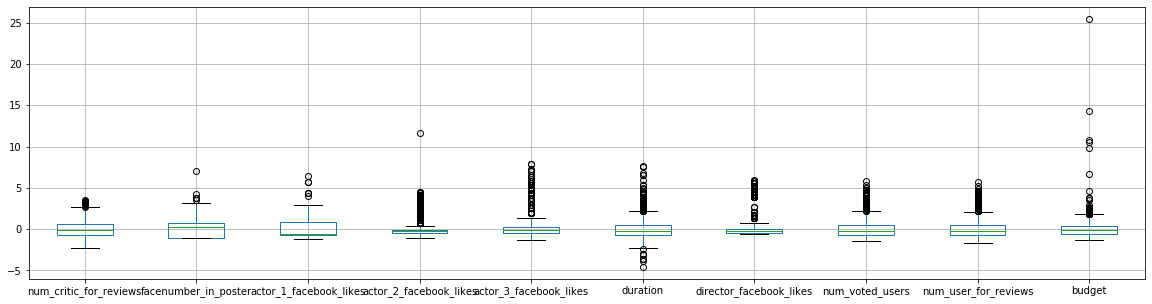

In [1995]:
plt.figure(figsize=(20,5))
X_train_num.boxplot()
plt.show()

In [1996]:
import statsmodels.api as sm

#### One-hot encoding for Categorical Variable.

In [1997]:
X_train_cat=pd.get_dummies(X_Train[["content_rating","title_year"]],drop_first=True)
X_test_cat=pd.get_dummies(X_Test[["content_rating","title_year"]],drop_first=True)

In [1998]:
X_train_cat.index=X_train_num.index=X_Train.index
X_test_cat.index=X_test_num.index=X_Test.index

#### Combining all the three 
* Numerical Processed
* Categorical Processed


In [1999]:
X_Train=pd.concat([X_train_num,X_train_cat],axis=1)
X_Train.head(2)

,num_critic_for_reviews,facenumber_in_poster,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,duration,director_facebook_likes,num_voted_users,num_user_for_reviews,budget,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_TV-MA,content_rating_Unrated,title_year_less than 2000,title_year_less than 2004,title_year_less than 2010
movie_title,,,,,,,,,,,,,,,,,,,
Shorts,-0.335573,1.430587,4.339287,-0.293514,0.011923,-0.967024,-0.586195,-1.005290,-1.100690,0.229328,0,1,0,0,0,0,0,0,1
Blood Diamond,0.242280,-1.011970,1.985148,0.768395,-0.013330,1.523806,0.250046,2.088279,1.185716,1.116402,0,0,0,1,0,0,0,0,1


In [2000]:
X_Test=pd.concat([X_test_num,X_test_cat],axis=1)
X_Test.head(2)

,num_critic_for_reviews,facenumber_in_poster,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,duration,director_facebook_likes,num_voted_users,num_user_for_reviews,budget,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_Unrated,title_year_less than 2000,title_year_less than 2004,title_year_less than 2010
movie_title,,,,,,,,,,,,,,,,,,
Earth,-1.247801,-1.01197,-1.029926,-0.766948,-0.831366,0.073115,0.244527,-0.993833,-0.944737,4.122292,0,0,0,0,1,1,0,0
The Lawnmower Man,-1.015991,-1.01197,-0.793879,-0.614821,-0.634175,1.399376,-0.343526,-0.487290,-0.666175,-0.533893,0,0,0,1,0,1,0,0


#### Base Model 

In [2001]:
xc=sm.add_constant(X_train_num)
model=sm.OLS(Y_Train,xc).fit()  
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     315.2
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:18:28   Log-Likelihood:                -55596.
No. Observations:                2911   AIC:                         1.112e+05
Df Residuals:                    2900   BIC:                         1.113e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

ASSUMPTIONS VERIFICATION:
   * Multicollinearity
   * Normality
   * Linearity
   * Homoscedasticity
   * No-Autocorrelation

#### 1.Multicollinearity

In [2002]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vi


In [2003]:
vif_df=X_Train
vif=pd.DataFrame()
vif['VIF_Factor']=[vi(vif_df.values,i) for i in range (vif_df.shape[1])]
vif['Features']=vif_df.columns
vif.sort_values('VIF_Factor',ascending=False).reset_index(drop=True)

,VIF_Factor,Features
0,4.936693,num_user_for_reviews
1,4.654606,num_voted_users
2,4.420694,num_critic_for_reviews
3,3.393903,title_year_less than 2000
4,3.204678,content_rating_R
5,2.807931,title_year_less than 2004
6,2.544336,actor_2_facebook_likes
7,2.345442,content_rating_PG-13
8,2.089458,actor_3_facebook_likes
9,2.031132,title_year_less than 2010


#### 2. Normality

In [2004]:
model.resid.skew()

1.6995550102706183

In [2005]:
Y_Train=Y_Train.apply(lambda x:x**(1/2))
Y_Test=Y_Test.apply(lambda x:x**(1/2))


In [2006]:
xc=sm.add_constant(X_Train)
model=sm.OLS(Y_Train,xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     270.3
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:18:29   Log-Likelihood:                -26908.
No. Observations:                2911   AIC:                         5.386e+04
Df Residuals:                    2891   BIC:                         5.398e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [2007]:
# Normality 
#Check normality for residue
#residue = yactual - ypred
inpc=sm.add_constant(X_Train)
ypred=model.predict(inpc)
residue=Y_Train-ypred
residue.skew()

-0.3779308570160714

#### 3. Linearity Assumptions

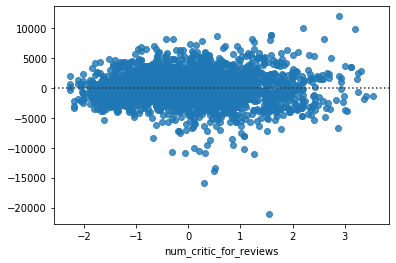

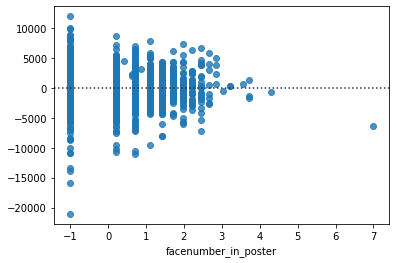

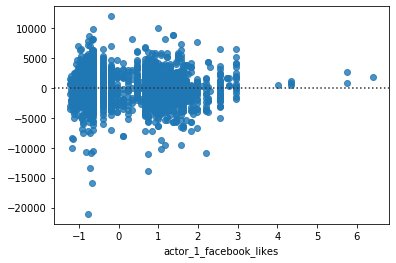

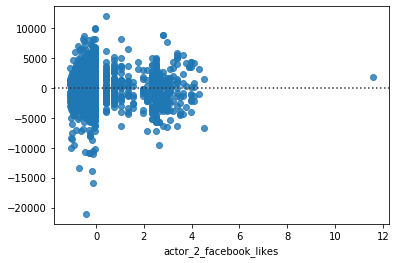

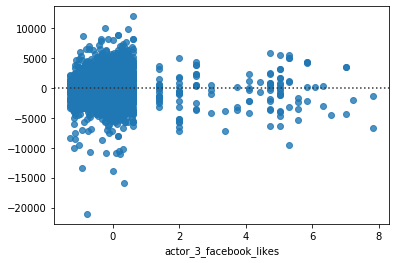

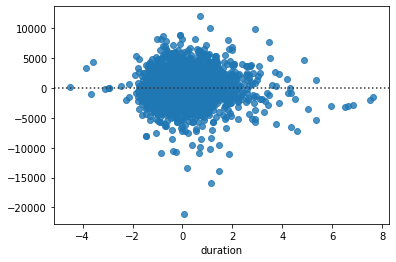

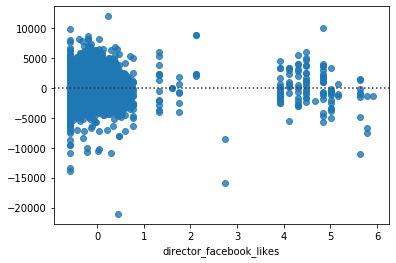

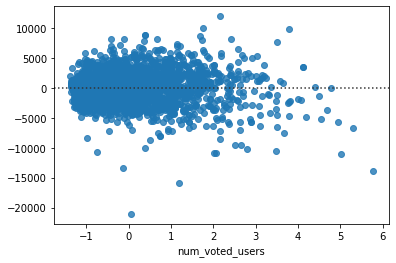

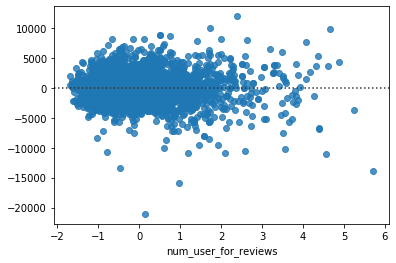

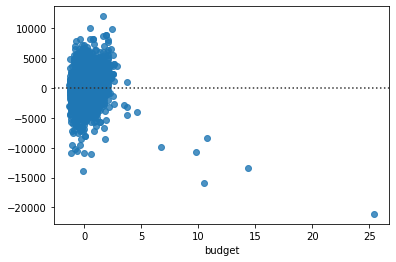

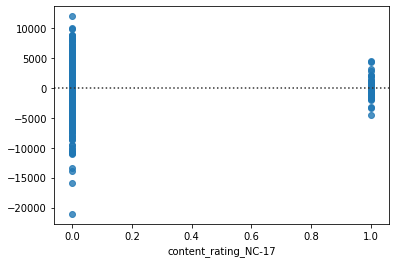

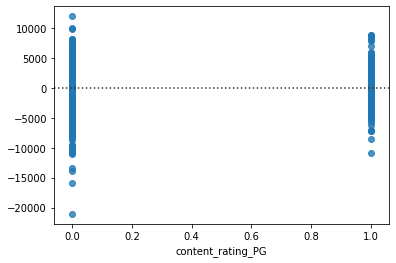

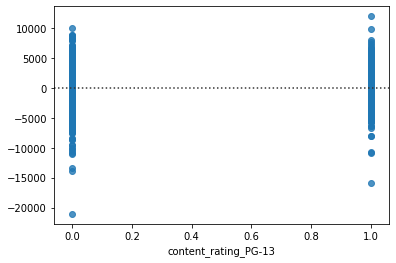

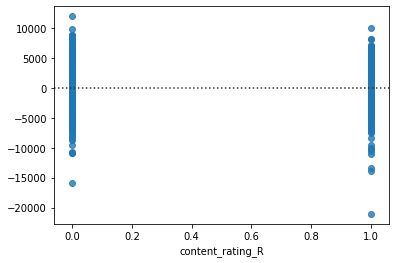

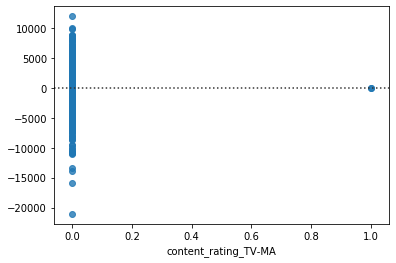

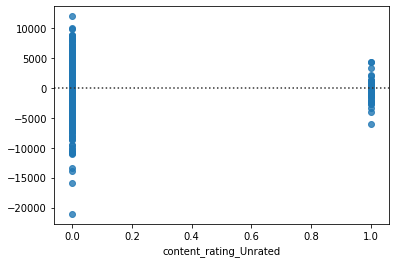

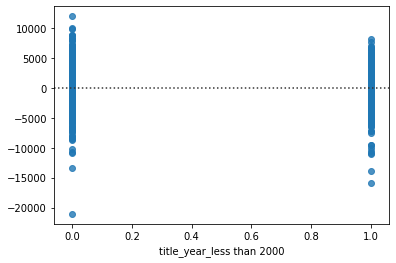

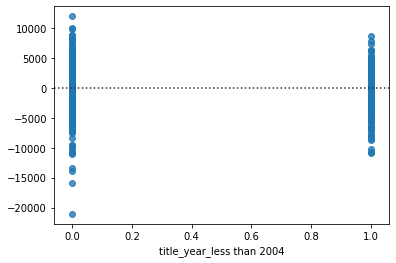

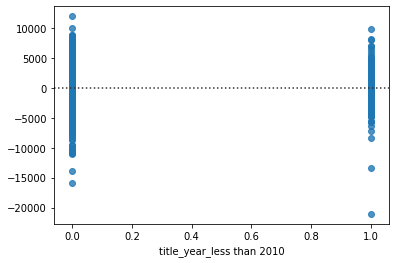

In [2008]:
for i in X_Train.columns:
    sns.residplot(X_Train[i],model.resid)
    plt.show()

* Scatter plot between the each input and the residue is completely random 
* and symmetric about zero residue axis
            Thus Linearity is satisfied.
    

#### 4. Homoscadacity

In [2009]:
from statsmodels.stats.api import het_goldfeldquandt
stat,p,nat=het_goldfeldquandt(model.resid,X_Train)
if p > 0.05:
    print("#H0 : Model is Homoscadastic")
else:
    print("#Ha : Model is Heteroscadastic")
 

#H0 : Model is Homoscadastic


#### 5.No-Autocorrelation

Durbin-Watson is around 2
Thus its variables does not autocorrelate.

### Backward elimination algorithm

In [2010]:
inp_pf1=X_Train.copy()
while(len(inp_pf1.columns)>0):
    inpc=sm.add_constant(inp_pf1)
    ols=sm.OLS(Y_Train.values,inpc)
    ols_mod=ols.fit()

    f=ols_mod.pvalues.idxmax()
    if ols_mod.pvalues.max()>0.05:
        inp_pf1=inp_pf1.drop(f,axis=1)
    else:
        break

print("The Final Feature: ",inp_pf1.columns)

The Final Feature:  Index(['actor_1_facebook_likes', 'actor_2_facebook_likes',
       'actor_3_facebook_likes', 'director_facebook_likes', 'num_voted_users',
       'num_user_for_reviews', 'budget', 'content_rating_NC-17',
       'content_rating_PG-13', 'content_rating_R', 'content_rating_Unrated',
       'title_year_less than 2000', 'title_year_less than 2010'],
      dtype='object')


In [2011]:
X_Train=X_Train[inp_pf1.columns]
X_Test=X_Test[inp_pf1.columns]

Building Model-- after backward elimination

In [2012]:
xc=sm.add_constant(X_Train)
model=sm.OLS(Y_Train,xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     394.1
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:18:38   Log-Likelihood:                -26912.
No. Observations:                2911   AIC:                         5.385e+04
Df Residuals:                    2897   BIC:                         5.394e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [2013]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

#### Regularization Techniques

In [2014]:
lr=LinearRegression()
score=cross_val_score(lr,X_Train[inp_pf1.columns],Y_Train,cv=5,scoring='r2')
avg_score=np.mean(score)
ve=np.std(score)
cve=np.std(score)/np.mean(score)
res_lr=(avg_score,ve,cve)
print(res_lr)

(0.6246188088450213, 0.028014361935284223, 0.04485033357718671)


In [2015]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [2016]:
param={'alpha':[0.0000005,0.00001,0.0001,0.001,0.01,0.1,0.2,0.5,0.8,1,2,5,10,20,30,50,100]}

Rid=Ridge(normalize=True)
grid=GridSearchCV(Rid,param_grid=param,scoring='r2',cv=5)

mod_grid=grid.fit(X_Train[inp_pf1.columns],Y_Train)
mod_grid.best_params_

{'alpha': 0.001}

In [2017]:
mod_rid=Ridge(alpha=0.001,normalize=True)
score=cross_val_score(mod_rid,X_Train,Y_Train,cv=5,scoring='r2')

avg_score=np.mean(score)
ve=np.std(score)
cve=np.std(score)/np.mean(score)
res_rid=avg_score,ve,cve
res_rid

(0.624629010916157, 0.028014667498213342, 0.0448500902273553)

In [2018]:
param={'alpha':[0.00001,0.0001,0.001,0.01,0.1,0.2,0.5,0.8,1,2,5,10,20,30,50,100]}

las=Lasso(normalize=True)
grid=GridSearchCV(las,param_grid=param,scoring='r2',cv=5)

mod_grid=grid.fit(X_Train[inp_pf1.columns],Y_Train)
mod_grid.best_params_

{'alpha': 1e-05}

In [2019]:
mod_las=Lasso(alpha=1e-05,normalize=True)
score=cross_val_score(mod_las,X_Train,Y_Train,cv=5,scoring='r2')

avg_score=np.mean(score)
ve=np.std(score)
cve=np.std(score)/np.mean(score)
res_las=avg_score,ve,cve
res_las

(0.6246188076887716, 0.028014361638816765, 0.044850333185573014)

In [2020]:
param={'alpha':[0.00001,0.0001,0.001,0.01,0.1,0.2,0.5,0.8,1,2,5,10,20,30,50,100]}

elas=ElasticNet(normalize=True)
grid=GridSearchCV(elas,param_grid=param,scoring='r2',cv=5)

mod_grid=grid.fit(X_Train[inp_pf1.columns],Y_Train)
mod_grid.best_params_

{'alpha': 1e-05}

In [2021]:
mod_enet=ElasticNet(alpha=1e-05,normalize=True)
score=cross_val_score(mod_enet,X_Train,Y_Train,cv=5,scoring='r2')

avg_score=np.mean(score)
ve=np.std(score)
cve=np.std(score)/np.mean(score)
res_enet=avg_score,ve,cve
res_enet

(0.6245857824926517, 0.028022049060226515, 0.044865012694323046)

In [2022]:
score_card=pd.DataFrame()
score_card['LR']=res_lr
score_card['Ridge']=res_rid
score_card['Lasso']=res_las
score_card['ElasticNet']=res_enet
score_card.index=['avg_model_error','Variance','Coefficient_of_Variance']
score_card

,LR,Ridge,Lasso,ElasticNet
avg_model_error,0.624619,0.624629,0.624619,0.624586
Variance,0.028014,0.028015,0.028014,0.028022
Coefficient_of_Variance,0.044850,0.044850,0.044850,0.044865


#### Final Model:

In [2023]:

lr=LinearRegression()
mod=lr.fit(X_Train,Y_Train)

In [2024]:
ypred_test=mod.predict(X_Test)
ypred_train=mod.predict(X_Train)


In [2025]:
r2_train=r2_score(Y_Train,ypred_train)
r2_test=r2_score(Y_Test,ypred_test)
print("R2 train is {}".format(r2_train))
print("R2 test is {}".format(r2_test))

R2 train is 0.6387960139594313
R2 test is 0.6384021642649471


In [2026]:
rmse_test=(mean_squared_error(Y_Test,ypred_test))**0.5
rmse_train=(mean_squared_error(Y_Train,ypred_train))**0.5
print("RMSE train is {}".format(rmse_train))
print("Rmse test is {}".format(rmse_test))

RMSE train is 2504.790729592435
Rmse test is 2488.631079867178


From the above scores, there is no over-fitting thus no need of Regularized model.

#### Model Explainability

In [2027]:
pd.DataFrame(data=mod.coef_,index=X_Train.columns,columns=["Coefficient of respective columns"]).sort_values("Coefficient of respective columns",ascending=False)

,Coefficient of respective columns
num_voted_users,2278.789301
budget,742.004727
title_year_less than 2000,548.695778
actor_3_facebook_likes,374.880559
num_user_for_reviews,267.808486
actor_2_facebook_likes,226.688366
director_facebook_likes,-112.458711
actor_1_facebook_likes,-148.146763
title_year_less than 2010,-509.893171
content_rating_PG-13,-998.303040


Keeping other columns constant, unit change in "num_voted_users" for a movie affect the Gross by around 2278 times(+ve slope), and so on.

Note: Here we have to take square of gross output to get exact gross, Since as per the model fitting we have transformed the output column.

#### Handling NaNs in Target variable:

In [2028]:
df2.head(2)

,num_critic_for_reviews,facenumber_in_poster,actor_1_facebook_likes,title_year,actor_2_facebook_likes,actor_3_facebook_likes,duration,director_facebook_likes,num_voted_users,num_user_for_reviews,budget,gross,content_rating
movie_title,,,,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,8.4,0.0,131.0,after 2010,12.0,6.2,91.4,131.0,8.0,5.0,1660000.0,NaN,Unrated
The Lovers,10.0,3.0,622.0,after 2010,525.0,283.0,109.0,596.0,2138.0,15.0,5000000.0,NaN,R


In [2029]:
NUM=df2.select_dtypes(include=np.number).drop("gross",axis=1)

In [2030]:
# standard scaling
num=pd.DataFrame(scaler.transform(NUM),columns=NUM.columns,index=df2.index)

In [2031]:
cat=pd.get_dummies(df2[["content_rating","title_year"]],drop_first=True)

In [2032]:
inp_nan=pd.concat([num,cat],axis=1)
inp_nan=inp_nan[X_Train.columns]
df2["Predicted_Gross"]=lr.predict(inp_nan)

In [2033]:
df2["Predicted_Gross"].head(2)

movie_title
Star Wars: Episode VII - The Force Awakens                 295773.243789
The Lovers                                                 928024.960528
Name: Predicted_Gross, dtype: float64

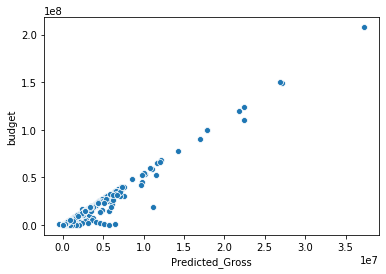

In [2034]:
sns.scatterplot(df2["Predicted_Gross"],df2["budget"])
plt.show()